         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

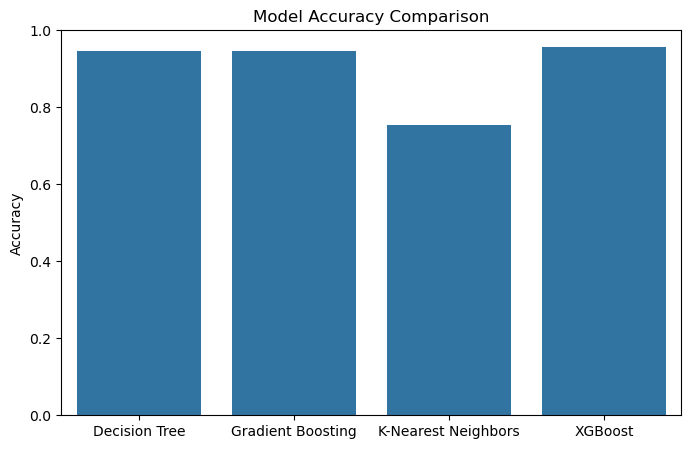

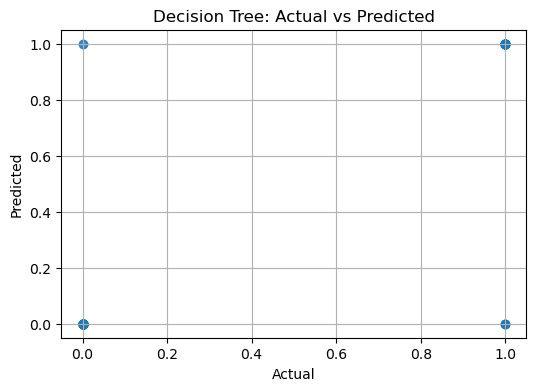

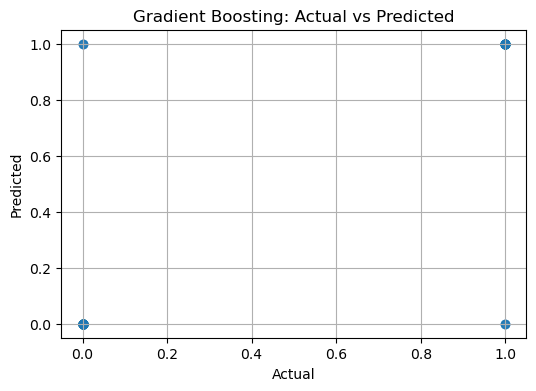

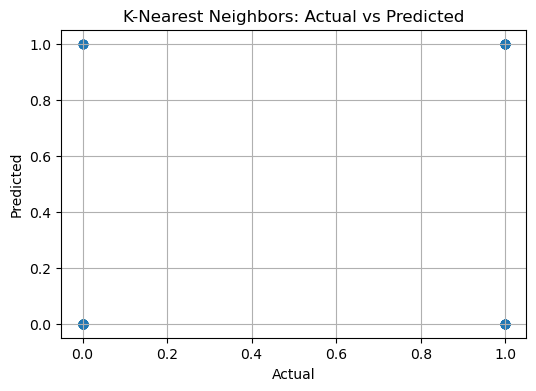

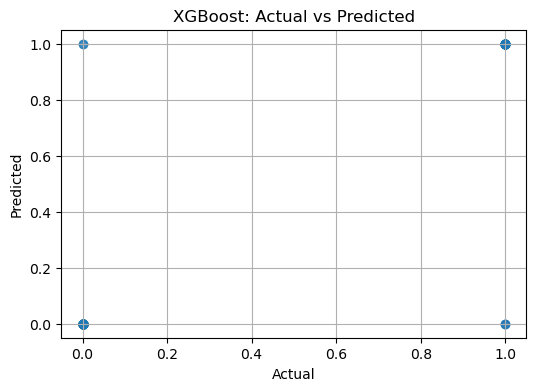

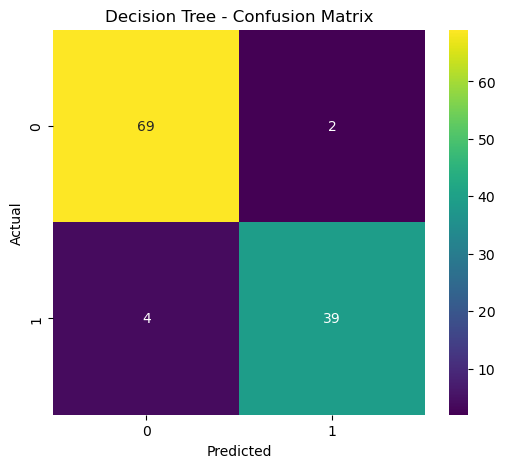

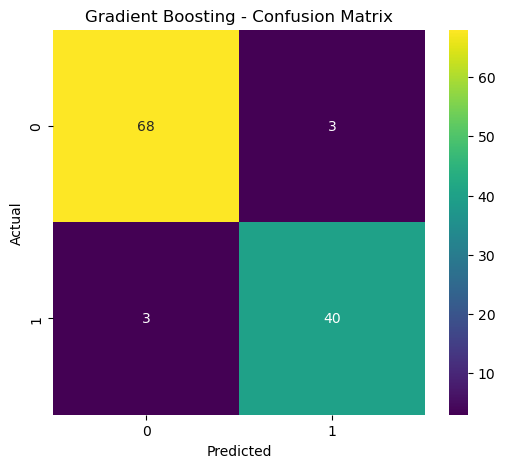

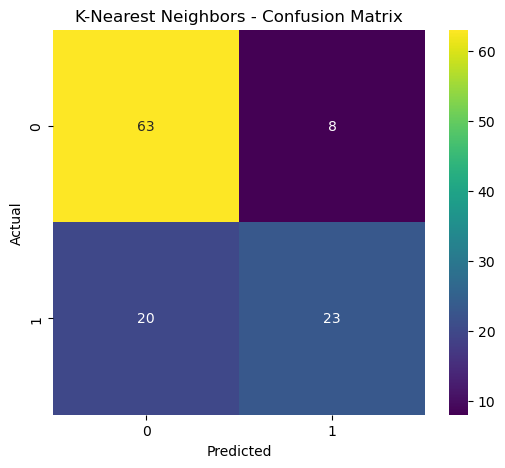

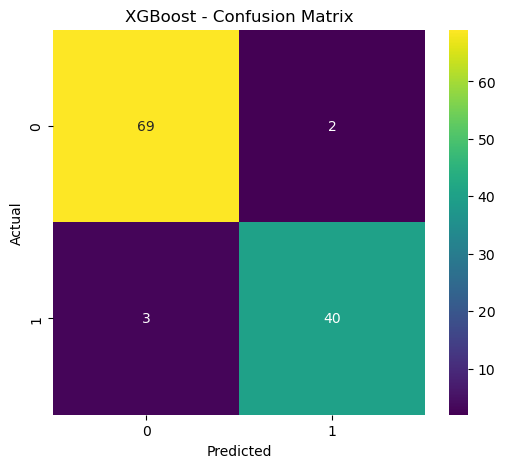

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('breast-cancer.csv')  # Replace with the path to your CSV file

# Inspect the columns to identify target column
print(df.head())
print(df.columns)

# Assuming the target column is 'diagnosis', encode the target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # Encode 'B' as 0 and 'M' as 1

# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Features (all columns except target)
y = df['diagnosis']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier( eval_metric='logloss', random_state=42)
}

# To store the metrics
metrics = {}

# Train each model and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    metrics[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': accuracy,
        'Confusion Matrix': cm
    }
    
    # Print the metrics for each model
    print(f"\n{model_name} Metrics:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

# Step 1: Accuracy comparison bar chart
model_names = list(metrics.keys())
accuracies = [metrics[model]['Accuracy'] for model in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Step 2: Scatter plots: Actual vs Predicted
for i, model_name in enumerate(model_names):
    pred = models[model_name].predict(X_test)
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, pred, alpha=0.6)
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

# Step 3: Confusion matrices
for i, model_name in enumerate(model_names):
    cm = metrics[model_name]['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


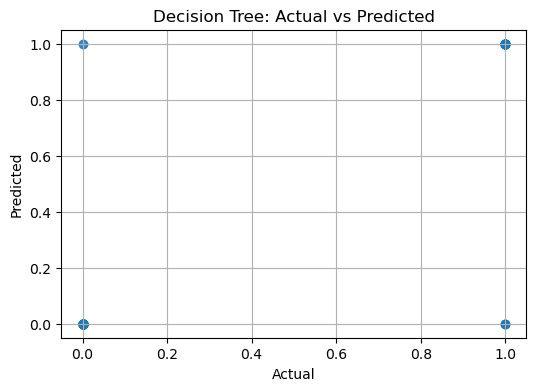

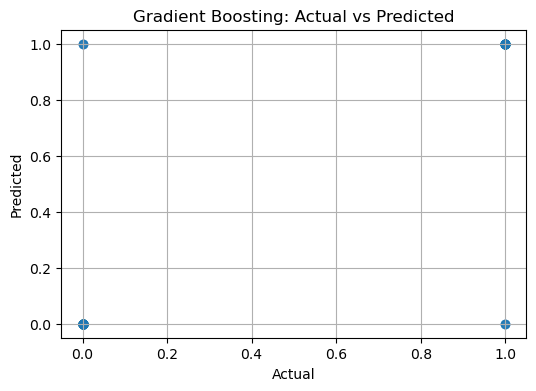

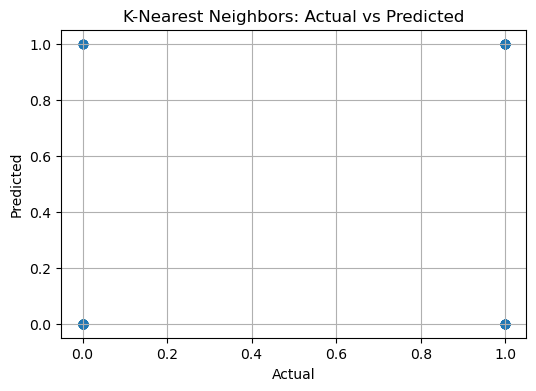

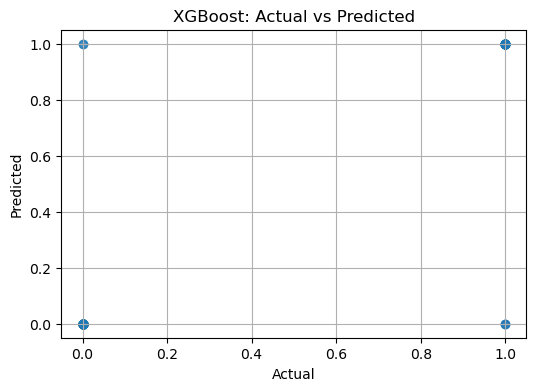

In [53]:
for i, model_name in enumerate(model_names):
    pred = models[model_name].predict(X_test)
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, pred, alpha=0.6)
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
